In [4]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy import stats
import math
import csv

In [ ]:

f1 = open('source/full_music_data.csv','r',encoding="UTF-8")
reader = csv.reader(f1)

fn = open('source/full_music_data_genre.csv','w',newline='')
writer = csv.writer(fn)

data=pd.read_csv("source/influence_data.csv",header=None)
writer.writerow(['artists_id', 'danceability', 'energy', 'valence', 'tempo', 'loudness', 'mode', 'key', 'acousticness', 'instrumentalness', 'liveness', 'speechiness', 'explicit', 'duration_ms', 'popularity', 'year', 'release_date','genre','id'])
count = 0
for i in reader:
    if i[0] == 'artist_names':continue
    id=i[1].strip('[')
    id=id.strip(']')
    id=id.split(',')
    id=id[0]
    print(id)
    gen='#'
    count=count+1
    for k in range(1,len(data[0])):
        if id==data[0][k] :
            gen=data[2][k]
            break
        elif id == data[4][k]:
            gen=data[6][k]
            break
    writer.writerow([i[1],i[2],i[3],i[4],i[5],i[6],i[7],i[8],i[9],i[10],i[11],i[12],i[13],i[14],i[15],i[16],i[17],gen,count])

f1.close()

fn.close()

In [13]:
from scipy.spatial.distance import pdist
def cosd(vec1,vec2):
    Vec = np.vstack([vec1,vec2])
    dist = 1 - pdist(Vec,'cosine')
    return dist


In [6]:
df=pd.read_csv('data/artist_music_genre_data.csv')
flag=0
features=['danceability','energy','valence','tempo','loudness','mode','key','acousticness','instrumentalness','liveness','speechiness']
weight = [0.13470981,0.09339531,0.09970878,0.08239081,0.08566046,0.01475488,0.02386272,0.15717344,0.11752113,0.0732029 ,0.11761978]
for i in range(0,len(features)):
    s = np.ones_like(df[features[i]])
    s = s[:, None]
    for k in range(0, len(df[features[i]])):
        if df[features[i]][k] < 0:
            temp=df[features[i]][k]+60
        else:temp=df[features[i]][k]
        s[k] = np.sqrt(temp)

    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    sc = minmax_scale.fit_transform(s)
    sc = np.multiply(sc, weight[i])
    if(flag == 0):
        mtx=sc
        flag = 1
    else: mtx=np.c_[mtx,sc]


In [8]:
u = np.mean(s) 
std = np.std(s)  
stats.kstest(s, 'norm', (u, std))
s=pd.DataFrame(s)

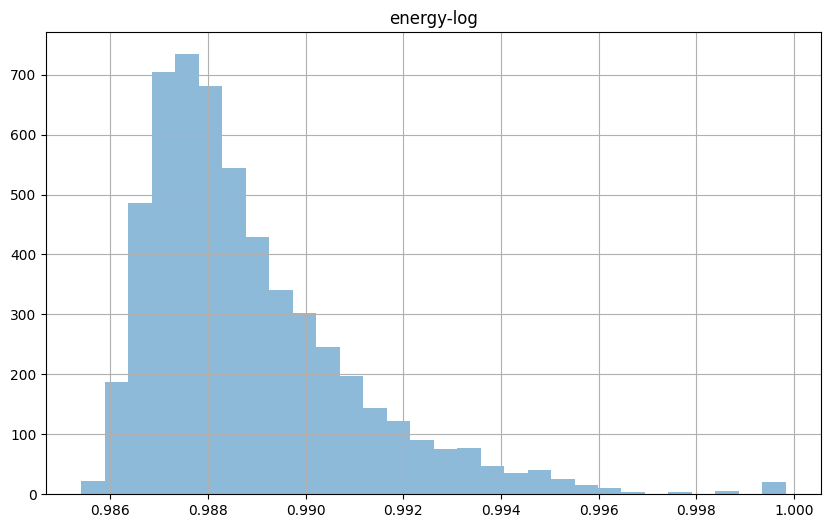

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

#histogram
fig,ax1=plt.subplots(figsize=(10,6))
#ax1=plt.subplot(1,1,1)
ax1.hist(s,bins=30,alpha=0.5)
ax1.plot(kind='kde',secondary_y=True,ax=ax1)
ax1.set_title("energy-log")
plt.grid()
plt.show()

In [21]:
#correlation analysis
df=pd.read_csv('data/artist_music_genre_data.csv')
dict={}
dict_count={}
genre='#'
for i in range(0,len(df)):
    ne=np.multiply([df['danceability'][i],df['energy'][i],df['valence'][i],df['tempo'][i],	df['loudness'][i],df['mode'][i],df['key'][i],df['acousticness'][i],df['instrumentalness'][i],df['liveness'][i],	df['speechiness'][i]],df['count'][i])
    ne=np.array(ne)
    if df['genre'][i] != genre:
        genre=df['genre'][i]
        dict.update({genre:ne})
        dict_count.update({genre:df['count'][i]})
    else:
        dict[genre]=dict[genre]+ne
        dict_count[genre]=dict_count[genre]+df['count'][i]

for h in dict.keys():
    kn=np.divide(dict[h],dict_count[h])
    dict[h]=kn

newdf=pd.DataFrame(dict)
newdf=newdf.T
features=['danceability','energy','valence','tempo','loudness','mode','key','acousticness','instrumentalness','liveness','speechiness']
newdf.columns=features

In [23]:
flag=0
weight = [0.13470981,0.09339531,0.09970878,0.08239081,0.08566046,0.01475488,0.02386272,0.15717344,0.11752113,0.0732029 ,0.11761978]
for i in range(0,len(features)):
    s2 = np.array(newdf[features[i]])
    s2 = s2[:, None]
    minmax_scale=preprocessing.MinMaxScaler(feature_range=(0,1))
    sc2=minmax_scale.fit_transform(s2)
    sc2=np.multiply(sc2,weight[i])
    if(flag == 0):
        mtx2=sc2
        flag = 1
    else: mtx2=np.c_[mtx2,sc2]

<AxesSubplot: >

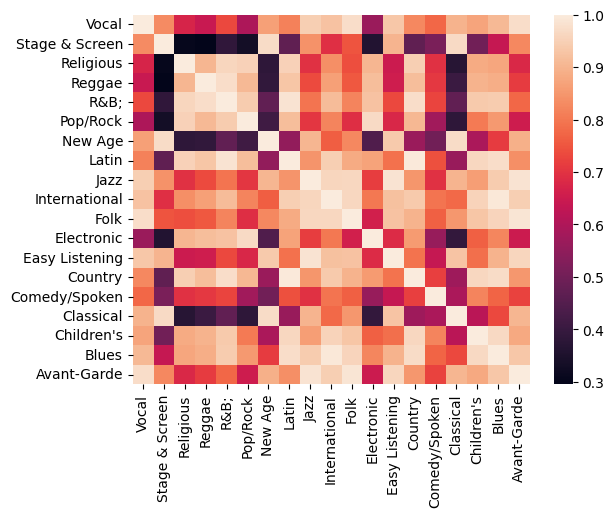

In [25]:
header=['Vocal', 'Stage & Screen', 'Religious', 'Reggae', 'R&B;', 'Pop/Rock', 'New Age', 'Latin', 'Jazz', 'International', 'Folk', 'Electronic', 'Easy Listening', 'Country', 'Comedy/Spoken', 'Classical', "Children's", 'Blues', 'Avant-Garde']
mtxp=pd.DataFrame(mtx2,index=header)
a=np.random.randn(19,19)
corr=pd.DataFrame(data=a,index=header,columns=header)

# for i in range(0,19):
#    for j in range(0,19):
#         corr[header[i]][header[i]]=cosd(dict[header[i]],dict[header[j]])
mtxp=mtxp.T
for i in range(0,19):
      for j in range(0,19):
         corr[header[i]][header[j]]=cosd(np.array(mtxp[header[i]]),np.array(mtxp[header[j]]))

import seaborn
seaborn.heatmap(corr)

[0.42292786 0.25715413 0.13333235 0.07735187]


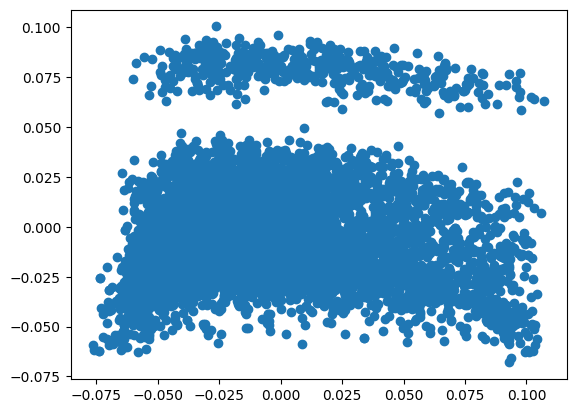

In [10]:
#PCA analysis
pca=PCA(n_components=0.85)
pca.fit(mtx)
newX=pca.fit_transform(mtx)
print(pca.explained_variance_ratio_)
newXp=pd.DataFrame(newX)
xx=np.array(newXp[0])
yy=np.array(newXp[1])
zz=np.array(newXp[2])
plt.scatter(xx,yy)

In [14]:
import random
dict={}
f1 = open('data/artist_music_genre_data.csv','r',encoding="UTF-8")
reader = csv.reader(f1)

genre='#'
for line in reader:
    if line[1]== 'artist_id':continue
    if line[18] == '':break
    if line[16] != genre:
        genre=line [16]
        dict.update({genre:[]})
    else:
        dict[genre].append(int(line[17]))

f1.close()

dictd={}
for header in dict.keys():
    if header not in dictd.keys():
        dictd.update({header:[]})
        if(len(dict[header])>30):
            sample=random.sample(dict[header],30)
        else: sample=dict[header]
    for i in range(0,len(sample)):
        for j in range(i+1,len(sample)):
            x=newX[dict[header][i]-1]
            y=newX[dict[header][j]-1]
            newdist=cosd(x,y)
            dictd[header].append(newdist)

In [27]:
#KMeans cluster
colors=['black','silver','rosybrown','lightcoral','firebrick','sandybrown','orange','gold','darkkhaki','olive','olivedrab','greenyellow','pink','purple','mediumturquoise','cyan','steelblue','slateblue','violet']
cluster = KMeans(n_clusters=19, random_state=0)
model = cluster.fit(newX)

c:\Users\64632\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


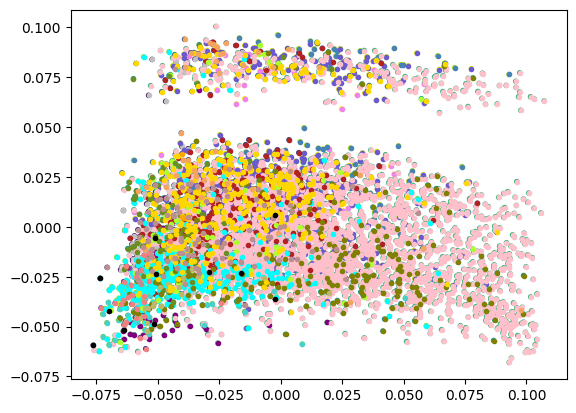

In [30]:
#plt.scatter(dictd['Vocal'].index,dictd['Vocal'])
label=np.array(df['genreid'])
plt.scatter(xx,yy,c=label,marker='.')
for i in range(0,len(label)):
     plt.scatter(newXp[0][i],newXp[1][i],c=colors[label[i]],marker='.')

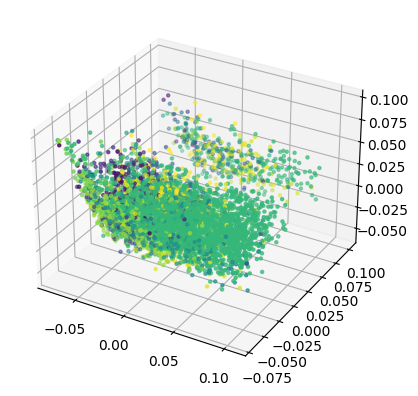

In [35]:
ax = plt.figure().add_subplot(111, projection = '3d')
ax.scatter(xx, yy, zz, c = label, marker = '.')